# Image Classification Program 

#### Import all necessary packages before starting the program

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
import keras


from keras import layers
from keras import datasets
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np

import urllib.request
from PIL import Image

from sklearn.metrics import classification_report,confusion_matrix

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#### Load the cifar10 dataset 
For now, this will be the dataset I use to determine the diff shapes


In [9]:

cifar_data = keras.datasets.cifar10

(data_train, label_train), (data_test, label_test) = cifar_data.load_data()

assert data_train.shape == (50000, 32, 32, 3)
assert data_test.shape == (10000, 32, 32, 3)
assert label_train.shape == (50000, 1)
assert label_test.shape == (10000, 1)

#Normalize the Data
data_train = np.array(data_train) / 255
data_test = np.array(data_test) / 255


#### Set up the neural network model


In [21]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu',
                        input_shape=(32,32,3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Dropout(0.4),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

opt = Adam(learning_rate=0.00001)
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 14400)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               1843328   
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                      

#### Fit the training data to the model using 10 epochs.(evalutaing with 30 epochs now)
After 1st run, the accuracy was ~67.8% with loss ~1.05 <br>
After 2nd run, the accuracy was ~87.6% with loss ~0.41 <br>
After 3rd run, the accuracy was ~91.4% with loss ~0.33


In [22]:
history = model.fit(x=data_train, y=label_train, epochs=100)
test_loss, test_accuracy = model.evaluate(data_train, label_train)

print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Epoch 1/100
1563/1563 [==============================] - 53s 33ms/step - loss: 1.4607 - accuracy: 0.4806
Epoch 2/100
1563/1563 [==============================] - 51s 32ms/step - loss: 1.1773 - accuracy: 0.5858
Epoch 3/100
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0719 - accuracy: 0.6268
Epoch 4/100
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9965 - accuracy: 0.6541
Epoch 5/100
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9480 - accuracy: 0.6686
Epoch 6/100
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8989 - accuracy: 0.6843
Epoch 7/100
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8604 - accuracy: 0.6985
Epoch 8/100
1563/1563 [==============================] - 51s 32ms/step - loss: 0.8234 - accuracy: 0.7116
Epoch 9/100
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7845 - accuracy: 0.7231
Epoch 10/100
1563/1563 [==============================]

1563/1563 [==============================] - 51s 33ms/step - loss: 0.1392 - accuracy: 0.9547
Epoch 79/100
1563/1563 [==============================] - 50s 32ms/step - loss: 0.1372 - accuracy: 0.9549
Epoch 80/100
1563/1563 [==============================] - 53s 34ms/step - loss: 0.1388 - accuracy: 0.9553
Epoch 81/100
1563/1563 [==============================] - 52s 33ms/step - loss: 0.1281 - accuracy: 0.9579
Epoch 82/100
1563/1563 [==============================] - 51s 32ms/step - loss: 0.1352 - accuracy: 0.9569
Epoch 83/100
1563/1563 [==============================] - 51s 32ms/step - loss: 0.1322 - accuracy: 0.9570
Epoch 84/100
1563/1563 [==============================] - 51s 32ms/step - loss: 0.1297 - accuracy: 0.9576
Epoch 85/100
1563/1563 [==============================] - 51s 33ms/step - loss: 0.1260 - accuracy: 0.9584
Epoch 86/100
1563/1563 [==============================] - 54s 35ms/step - loss: 0.1294 - accuracy: 0.9583
Epoch 87/100
1563/1563 [==============================] - 5

#### Evaluate Result

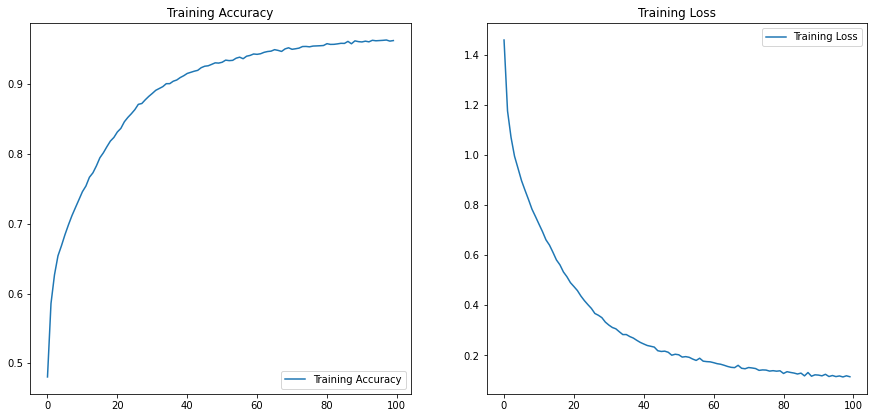

In [23]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [46]:
predictions = model.predict(data_test, batch_size=1) 
predictions = predictions.reshape(-1,1)[0]

print(classification_report(label_test, predictions, target_names = label_test))

10000/10000 [==============================] - 22s 2ms/step


ValueError: Found input variables with inconsistent numbers of samples: [10000, 1]

In [47]:
print(predictions[0])

3.0675548e-10
